# Prepare

In [2]:
# pip list
import tensorflow as tf
import cv2 # openCV for real time computer vision
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential # great for one data input and one data output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

## Remove bad images

In [3]:
data_dir = "data"
image_exts = ['jpeg','jpg']

bikes_dir = os.listdir("data")[1:] # list all the directories inside the data folder
motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder

print("original bicycle length:",len(bicycle))
print("original motorcycle length:",len(motorcycle))

original bicycle length: 85
original motorcycle length: 89


In [4]:
for direct in bikes_dir:
    img_arr = pd.Series(os.listdir(os.path.join(data_dir, direct))) # atempt to rmove .ipynb_checkpoints from list of images
    for img in list(img_arr[~img_arr.isin([".ipynb_checkpoints"])]): # find the list of all images in each data folder
        img_path = os.path.join(data_dir,direct, img) # join full image path together
        try:
            image = cv2.imread(img_path) # read image as np array
            tip = imghdr.what(img_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except:
            print('Issue with image {}'.format(img_path))

motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder
print("new bicycle length:",len(bicycle))
print("new motorcycle length:",len(motorcycle))

Image not in ext list data/motorcycle/000019.jpg
Image not in ext list data/motorcycle/000009.png
Image not in ext list data/motorcycle/000045.png
Image not in ext list data/motorcycle/000079.jpg
Image not in ext list data/motorcycle/000086.jpg
Image not in ext list data/motorcycle/000053.png
Image not in ext list data/motorcycle/000043.png
Image not in ext list data/motorcycle/000069.jpg
Image not in ext list data/motorcycle/000041.jpg
Image not in ext list data/motorcycle/000055.png
Image not in ext list data/motorcycle/000058.png
Image not in ext list data/motorcycle/000064.png
Image not in ext list data/motorcycle/000059.jpg
Image not in ext list data/motorcycle/000073.png
Image not in ext list data/motorcycle/000072.png
Image not in ext list data/motorcycle/000066.png
Image not in ext list data/motorcycle/000063.png
Image not in ext list data/motorcycle/000048.jpg
Image not in ext list data/motorcycle/000060.jpg
Image not in ext list data/motorcycle/000074.png
Image not in ext lis

libpng warning: iCCP: known incorrect sRGB profile


Image not in ext list data/bicycle/000024.jpg
Image not in ext list data/bicycle/000034.png
Image not in ext list data/bicycle/000008.png
Image not in ext list data/bicycle/000020.jpg
Image not in ext list data/bicycle/000035.png
Image not in ext list data/bicycle/000023.png
Image not in ext list data/bicycle/000053.png
Image not in ext list data/bicycle/000041.png
Image not in ext list data/bicycle/000055.png
Image not in ext list data/bicycle/000058.png
Image not in ext list data/bicycle/000075.png
Image not in ext list data/bicycle/000048.jpg
Image not in ext list data/bicycle/000011.png
Image not in ext list data/bicycle/000001.png
original bicycle length: 70
original motorcycle length: 60


**image to array example**

In [5]:
# example reading image as np array
img_arr_ex = cv2.imread(os.path.join("data", "bicycle","000022.jpg"))
img_arr_ex[1]

array([[ 30,  27,  29],
       [ 30,  27,  29],
       [ 29,  26,  28],
       ...,
       [ 71,  81, 111],
       [ 71,  81, 111],
       [ 71,  81, 111]], dtype=uint8)

In [6]:
# 1167 pixels high
# 2000 pixels wide
# 3 chanels (colored picture)
img_arr_ex.shape

(2000, 3000, 3)

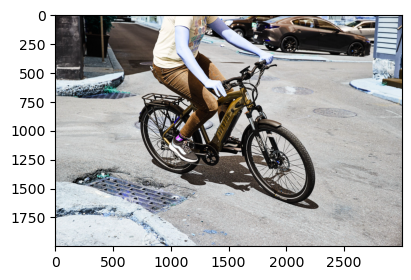

In [7]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(img_arr_ex)
plt.show()

**fix color**

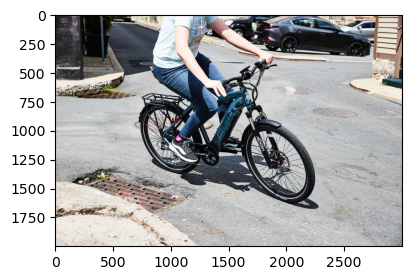

In [8]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(cv2.cvtColor(img_arr_ex, cv2.COLOR_BGR2RGB))
plt.show()

## Load data

In [9]:
# Build image dataset using keras image data set 
data = tf.keras.utils.image_dataset_from_directory("data") # data is the directory whre the image files are located
# bikes = np.copy(data)

Found 131 files belonging to 2 classes.


In [10]:
# convert the image dataset object to numpy arrays using an iterator
data_iterator = data.as_numpy_iterator()
data_iterator # you can loop through this iterator and get baches of data using the numpy next operator

**Batch return s two things:**

- The images
- The label: Determins if an image is a bicycle or a motorcycle (0,1)

In [11]:
# use the next operator to get a batch of data
batch = data_iterator.next()

**Images**

Each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

In [12]:
# get all the images from the batch
batch[0].shape
# each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

(32, 256, 256, 3)

**labels**

Which number represent bicycle and which represent motorcycle?
- `0`: Bicycle 
- `1`: Motorcyle

In [13]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int32)

In [14]:
data.class_names

['bicycle', 'motorcycle']

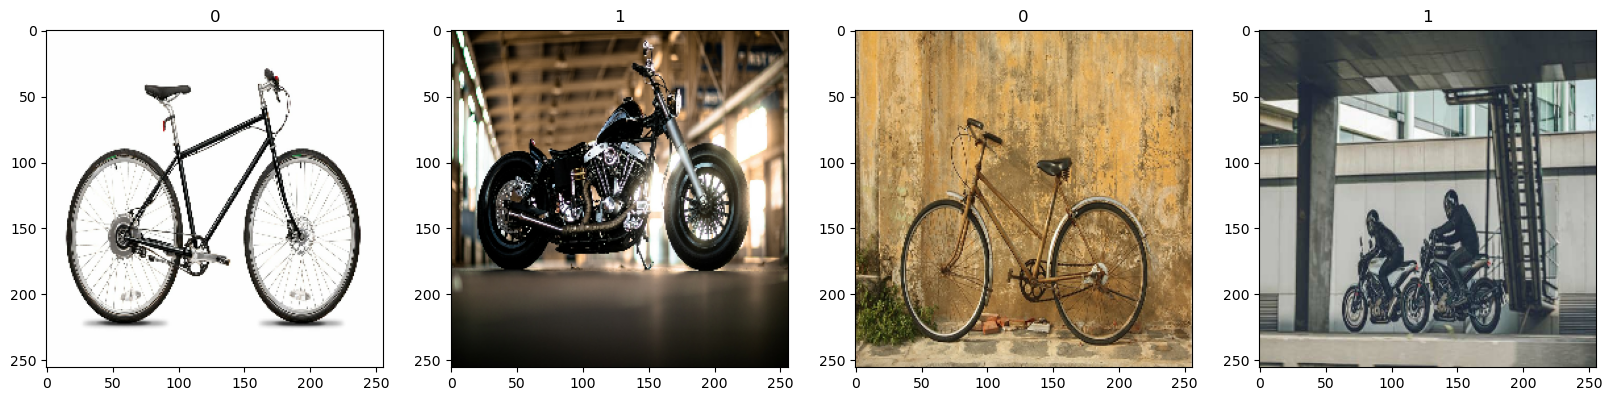

In [15]:
# determin wheater a image is motorcycle or bicycle
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling

In [16]:
# devide by 255 pixels
data = data.map(lambda x,y: (x/255, y))

# Get an iterator over the dataset
data.as_numpy_iterator().next()

# Get the first element from the iterator
# data = next(data_iterator)

(array([[[[5.25490224e-01, 4.62745100e-01, 3.64705890e-01],
          [5.33333361e-01, 4.70588237e-01, 3.72549027e-01],
          [5.33333361e-01, 4.70588237e-01, 3.72235000e-01],
          ...,
          [7.14437783e-01, 6.06793821e-01, 5.28760731e-01],
          [6.92355990e-01, 5.80790460e-01, 5.28262854e-01],
          [6.62745118e-01, 5.51179528e-01, 5.00597417e-01]],
 
         [[5.27917862e-01, 4.65172708e-01, 3.67133498e-01],
          [5.34696698e-01, 4.71951604e-01, 3.73912364e-01],
          [5.34696698e-01, 4.71951604e-01, 3.73598337e-01],
          ...,
          [6.89087391e-01, 5.47175646e-01, 4.48653907e-01],
          [6.81211710e-01, 5.36695778e-01, 4.59733814e-01],
          [6.27512634e-01, 4.85808074e-01, 3.97603035e-01]],
 
         [[5.30641675e-01, 4.67896610e-01, 3.69857401e-01],
          [5.37254930e-01, 4.74509805e-01, 3.76470596e-01],
          [5.37254930e-01, 4.74509805e-01, 3.76156569e-01],
          ...,
          [6.60002351e-01, 5.10982752e-01, 3.6884

## Split Data

In [21]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [22]:
train_size, val_size, test_size

(3, 1, 1)

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

 ## Build Deep Learning Model

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
# create a sequential mmodel
model = Sequential()

In [27]:
# The Conv2D class represents a 2D convolutional layer
# Used for feature extraction from images
# It applies convolutional filters (kernels) to input data
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

In [28]:
# The Conv2D class represents a 2D convolutional layer
# Used for feature extraction from images
# It applies convolutional filters (kernels) to input data
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [29]:
# The Dense class represents a fully connected (dense) layer
# Used for computations on entire input data
# Neurons in this layer are connected to all neurons in the previous layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [30]:
# The Flatten class represents a layer that flattens input data
# Converts multi-dimensional data to one-dimensional format
model.add(Flatten())

In [31]:
# The Dropout class represents a dropout layer
# Used for regularization to prevent overfitting
# Randomly sets a fraction of input units to zero during each update
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
# Compile the model for training
# Using the Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [34]:
# Set the directory where TensorBoard logs will be stored
logdir = 'logs'

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model using the fit function
# 'train' is the training dataset, 'val' is the validation dataset
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
# You want to see the loss going down and acuracy going up

Epoch 1/20
3/3 [==============================] - 2s 574ms/step - loss: 1.5450 - accuracy: 0.6042 - val_loss: 1.5029 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 2s 554ms/step - loss: 1.0623 - accuracy: 0.4792 - val_loss: 0.9906 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 2s 536ms/step - loss: 0.7625 - accuracy: 0.5312 - val_loss: 0.5201 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 2s 530ms/step - loss: 0.5914 - accuracy: 0.6875 - val_loss: 0.6566 - val_accuracy: 0.4375
Epoch 5/20
3/3 [==============================] - 2s 529ms/step - loss: 0.5629 - accuracy: 0.6458 - val_loss: 0.5081 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 2s 533ms/step - loss: 0.4671 - accuracy: 0.9167 - val_loss: 0.3870 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 2s 534ms/step - loss: 0.4322 - accuracy: 0.8542 - val_loss: 0.3286 - val_accuracy: 0.9688
Epoch 8/20
3/3 [====

## plot results

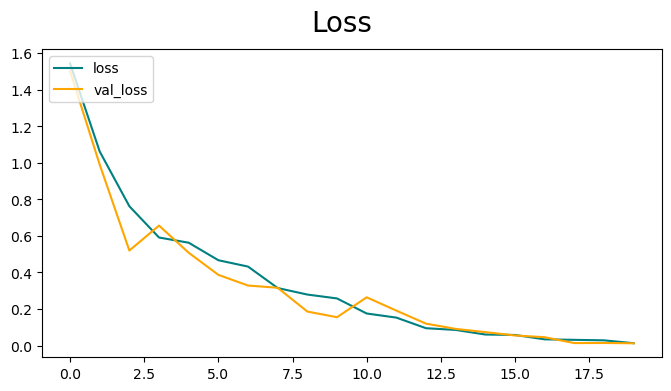

In [35]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


**My model is not abel to learn or reduce loss for the data provided. (byes problem)**
- the lose is not going down, so it looks like I need more data

**New results after adding new data and eliminating png files**
- looks like we are minimising loss. (things are working as the should)

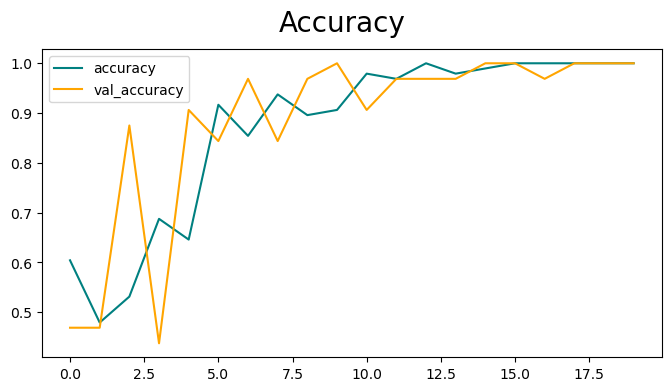

In [36]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [37]:
# Create instances of precision, recall, and binary accuracy metrics
pre = Precision()    # Precision metric
re = Recall()        # Recall metric
acc = BinaryAccuracy()  # Binary Accuracy metric

# Loop through batches in the 'test' dataset
for batch in test.as_numpy_iterator(): 
    X, y = batch  # Get input data 'X' and corresponding labels 'y'
    yhat = model.predict(X)  # Predictions from the model for the input data 'X'
    
    # Update the metric states with the true labels 'y' and predictions 'yhat'
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 38ms/step


In [38]:
# Print the results of precision, recall, and binary accuracy metrics
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Binary Accuracy:", acc.result().numpy())

Precision: 1.0
Recall: 1.0
Binary Accuracy: 1.0


## Test

In [55]:
# img = cv2.imread('000019.jpg')
# plt.imshow(img)
# plt.show()

In [56]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [57]:
# yhat = model.predict(np.expand_dims(resize/255, 0))
# yhat

In [58]:
# if yhat > 0.5: 
#     print(f'Predicted class is Sad')
# else:
#     print(f'Predicted class is Happy')

## Save model

In [ ]:
# model.save(os.path.join('models','imageclassifier.h5'))
# new_model = load_model('imageclassifier.h5')
# new_model.predict(np.expand_dims(resize/255, 0))